In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import numpy as np
from preprocessed_mnist import load_dataset
from sklearn import preprocessing

sess = tf.Session()

# input data
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
m1 = X_train.shape[1] * X_train.shape[2]
lb = preprocessing.LabelBinarizer()
lb.fit(y_train)
y_train = lb.transform(y_train)
y_val = lb.transform(y_val)
y_test = lb.transform(y_test)
X_train = X_train.reshape((X_train.shape[0], m1))
X_val = X_val.reshape((X_val.shape[0], m1))
X_test = X_test.reshape((X_test.shape[0], m1))

Using TensorFlow backend.


In [3]:
# parameters
learning_rate = 0.001
batch_size = 128
epoc = 15


# network parameters
m2 = 100
m3 = y_train.shape[1]

X = tf.placeholder(tf.float64, shape=(None, m1))
y = tf.placeholder(tf.float64, shape=(None, m3))


# define parameters
W1 = tf.cast(tf.Variable(tf.random_normal([m1, m2], mean=0, stddev=0.01),
                         name="w1"), tf.float64)
b1 = tf.cast(tf.Variable(tf.zeros([1, m2]), name="b1"), tf.float64)

W2 = tf.cast(tf.Variable(tf.random_normal([m2, m3], mean=0, stddev=0.01), 
                         name="w2"), tf.float64)
b2 = tf.cast(tf.Variable(tf.zeros([1, m3]), name='b2'), tf.float64)

# define place holders
h1 = tf.matmul(X, W1) + b1
h2 = tf. matmul(tf.nn.relu(h1), W2) + b2
y_pred = tf.nn.softmax(h2)

correct_pred = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float64))

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    labels=y, logits=h2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

In [4]:
sess.run(tf.global_variables_initializer())
train_loss = []
test_loss = []
for step in range(epoc):
    indexes = np.arange(X_train.shape[0])
    np.random.shuffle(indexes)
    num_batches = int(X_train.shape[0] / batch_size)
    
    for i in range(num_batches - 1):
        batch_index = indexes[i * batch_size: (i+1) * batch_size]
        X_batch, y_batch = X_train[batch_index, :], y_train[batch_index]
        sess.run(optimizer, feed_dict={X: X_batch, y: y_batch})

    loss_train, acc_train = sess.run([cross_entropy, accuracy],
                                     feed_dict={X:X_train, y: y_train})
    loss_test, acc_test = sess.run([cross_entropy, accuracy], feed_dict={X:X_test, y: y_test})
    print("step: ", step, loss_train, acc_train, loss_test, acc_test)
    train_loss.append(loss_train)
    test_loss.append(loss_test) 

step:  0 0.281130362139 0.91998 0.272790915624 0.9206
step:  1 0.210788823635 0.93996 0.20892050843 0.9385
step:  2 0.161648060576 0.95442 0.167788392619 0.9511
step:  3 0.132325896201 0.9619 0.140982932963 0.9601
step:  4 0.110174337389 0.96928 0.126915407673 0.9637
step:  5 0.09394438107 0.97344 0.114955935737 0.9678
step:  6 0.0797702028617 0.9781 0.105308606127 0.9685
step:  7 0.069311036788 0.98052 0.0971215833691 0.9714
step:  8 0.0601897794894 0.98326 0.0954918254306 0.9718
step:  9 0.0537351955861 0.98518 0.0938216084937 0.972
step:  10 0.0453911426682 0.98792 0.0864104627198 0.9743
step:  11 0.0418743069331 0.98932 0.0884264448626 0.9739
step:  12 0.0369632602912 0.99094 0.0880675879282 0.9741
step:  13 0.0318082978239 0.99224 0.0823730532205 0.976
step:  14 0.0280236962055 0.99334 0.0834102017845 0.9749


## Loss v.s. Iteration

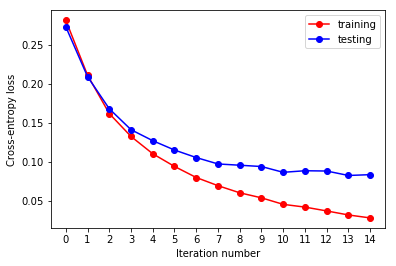

In [10]:
## Plot the loss vs epoch number
plt.figure(figsize=(6, 4))
plt.plot(np.arange(epoc), train_loss, 'r-o', label="training")
plt.plot(np.arange(epoc), test_loss, 'b-o', label="testing")
plt.xticks(np.arange(epoc))
plt.xlabel("Iteration number")
plt.ylabel("Cross-entropy loss")
plt.legend()

## Test accuracy - 97.49%

In [13]:
# report testing accuracy
print("The testing accuracy is %.4f."%acc_test)

The testing accuracy is 0.9749.
